In [1]:
import matplotlib.pyplot as plt
import random

import math

In [2]:
iterations=500
R={}
R[-1]=0
R[0]=R[1]=R[2]=R[3]=R[4]=0
R[5]=1
error_MC=[]
error_TD=[]
episodes=100
alpha=0.05

In [3]:
def calc_error(V):
    correct=[1./6,2./6,3./6,4./6,5./6]
    error=0.0
    for i in range(5):
        error+=(correct[i]-V[i])**2
    return math.sqrt(error/5)

In [4]:
def episode_MC():
    state=[]
    pos=2
    state.append(pos)
    while True:
        c=random.choice([-1,1])
        pos=pos+c
        if pos==-1 or pos==5:
            return state,R[pos]
        state.append(pos)

In [5]:
def MC_update(V,reward,state):
    appear={}
    avail=[]
    for i in range(len(state)):
        if state[i] not in appear:
            avail.append(1)
        else:
            avail.append(0)
        appear[state[i]]=1
    for i in range(len(state)-1,-1,-1):
        if avail[i]:
            V[state[i]]+=alpha*(reward-V[state[i]])
    return V

In [6]:
def episode_TD(V):
    pos=2
    state=[]
    state.append(pos)
    while True:
        c=random.choice([-1,1])
        r=R[pos+c]
        s=pos+c
        V[pos]+=alpha*(r+V[s]-V[pos])
        pos=s
        state.append(pos)
        if pos==-1 or pos==5:
            return V,state,R[pos]

In [7]:
def TD_update(V,reward,state):
    for i in range(len(state)-1):
        V[state[i]]+=alpha*(R[state[i+1]]+V[state[i+1]]-V[state[i]])
    return V

In [8]:
error_TD=[0]*100
for it in range(iterations):
    episodes_TD=[]
    rewards_TD=[]
    V_TD={}
    V_TD[-1]=V_TD[5]=0 #终止状态价值函数为0
    V_TD[0]=V_TD[1]=V_TD[2]=V_TD[3]=V_TD[4]=0.5
    for epi in range(episodes):
        V_TD,state,reward=episode_TD(V_TD)
        for i in range(epi):
            V_TD=TD_update(V_TD,rewards_TD[i],episodes_TD[i])
        error_TD[epi]+=calc_error(V_TD)
        episodes_TD.append(state)
        rewards_TD.append(reward)
for i in range(episodes):
    error_TD[i]/=iterations

In [9]:
error_MC=[0]*100
for it in range(iterations):
    episodes_MC=[]
    rewards_MC=[]
    V_MC={}
    V_MC[-1]=V_MC[5]=0 
    V_MC[0]=V_MC[1]=V_MC[2]=V_MC[3]=V_MC[4]=0.5
    for epi in range(episodes):
        state,reward=episode_MC()
        episodes_MC.append(state)
        rewards_MC.append(reward)
        for i in range(epi+1):
            V_MC=MC_update(V_MC,rewards_MC[i],episodes_MC[i])
        error_MC[epi]+=calc_error(V_MC)
for i in range(episodes):
    error_MC[i]/=iterations

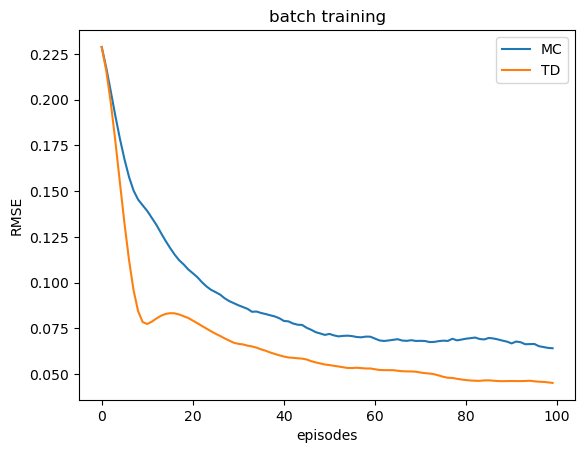

In [14]:
x=[i for i in range(100)]
plt.plot(x,error_MC,label="MC")
plt.plot(x,error_TD,label="TD")
plt.ylabel("RMSE")
plt.xlabel("episodes")
plt.title("batch training")
plt.legend()